## CSVファイル
四国電力の電力消費データは、先頭行に更新日時が記録されていて３行目にヘッダー（見出し）があります。<br>
ヘッダー行以降は、通常のCSVデータとして扱えます。

In [1]:
with open('data/juyo_shikoku_2017.csv', encoding='utf_8') as f:
    lines = f.readlines()
    for i in range(5):
        print(lines[i], end="")
        

2018/01/04 00:00 UPDATE,,
,,
DATE,TIME,実績(万kW)
2017/01/01,0:00,293
2017/01/01,1:00,299


## pandasでCSV読み込み
１つのCSVには１年分のデータが格納されています。pd.read_csvメソッドを使ってデータを読込みます。

In [2]:
import pandas as pd
pd.read_csv(
    # CSVファイル名
    'data/juyo_shikoku_2017.csv',
    # 先頭３行を読み飛ばし、列名はpandasで指定
    skiprows=3,
    # 列名指定
    names=['DATE', 'TIME', 'consumption'],
    # DATE列とTIME列を合わせてdata_hourという名前で時刻として取り扱うことを指定
    parse_dates={'date_hour': ['DATE', 'TIME']},
    # data_hourをインデックス指定
    index_col = "date_hour")

,consumption
date_hour,
2017-01-01 00:00:00,293
2017-01-01 01:00:00,299
2017-01-01 02:00:00,312
2017-01-01 03:00:00,315
2017-01-01 04:00:00,306
...,...
2017-12-31 19:00:00,321
2017-12-31 20:00:00,310
2017-12-31 21:00:00,298


## データの可視化
電力消費量を可視化するために、縦軸を電力消費量、横軸を時間にしたグラフを作成します。<br>
縦軸は１万KW単位、横軸は１日を24で割った0.417単位になっているので１目盛で１日です。<br>
180〜200日周期で夏季と冬季の電力消費量ピークがあるのがわかります。

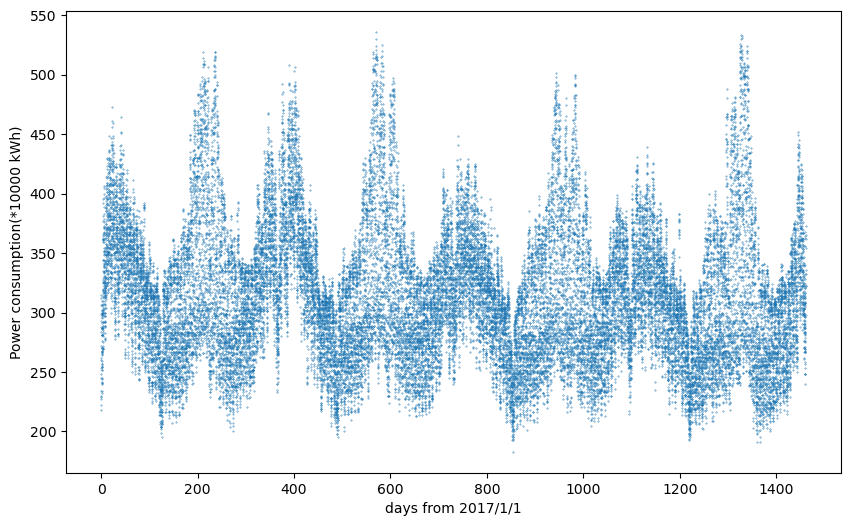

In [3]:
# coding: utf-8
import pandas as pd

years = [2017, 2018, 2019, 2020]

# 四国電力の電力消費量データを読み込み
ed = [pd.read_csv(
    'data/juyo_shikoku_{:d}.csv'.format(year),
    skiprows=3,
    names=['DATE', 'TIME', 'consumption'],
    parse_dates={'date_hour': ['DATE', 'TIME']},
    index_col = "date_hour")
    for year in years
]
elec_data = pd.concat(ed)

# -- 可視化 --
import matplotlib.pyplot as plt

# 画像のサイズを設定する
plt.figure(figsize=(10, 6))

# 1時間/24=0.416666...でtime列を追加
delta = elec_data.index - pd.to_datetime(str(years[0]) + '/01/01 00:00:00')
elec_data['time'] = delta.days + delta.seconds / 3600.0 / 24.0

# 縦軸：電力消費量 横軸：時間でグラフ作成
plt.scatter(elec_data['time'], elec_data['consumption'], s=0.1)
plt.xlabel('days from '+ str(years[0]) + '/1/1')
plt.ylabel('Power consumption(*10000 kWh)')

# グラフ保存
#plt.savefig('Power-consumption-graph.png')
plt.show()


In [4]:
elec_data['time']

date_hour
2017-01-01 00:00:00       0.000000
2017-01-01 01:00:00       0.041667
2017-01-01 02:00:00       0.083333
2017-01-01 03:00:00       0.125000
2017-01-01 04:00:00       0.166667
                          ...     
2020-12-31 19:00:00    1460.791667
2020-12-31 20:00:00    1460.833333
2020-12-31 21:00:00    1460.875000
2020-12-31 22:00:00    1460.916667
2020-12-31 23:00:00    1460.958333
Name: time, Length: 35064, dtype: float64

## 四国電力　過去の使用状況データのダウンロード
https://www.yonden.co.jp/nw/denkiyoho/download.html